In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

In [2]:
# 设置字符集，防止图片中的中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
# 设置jupyter图片显示方式
%matplotlib inline

### 特征之后的数据读取

In [5]:
data = pd.read_csv("./data/features01.csv")
data.head(3)

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,application_type_Individual,hardship_flag_N,disbursement_method_Cash,debt_settlement_flag_N,debt_settlement_flag_Y
0,5000.0,10.65,10,24000.0,1.0,27.65,0.0,1.0,0.0,3.0,...,0,0,0,0,1,1,1,1,1,0
1,2500.0,15.27,1,30000.0,0.0,1.00,0.0,5.0,0.0,3.0,...,0,0,0,0,1,1,1,1,1,0
2,2400.0,15.96,10,12252.0,1.0,8.72,0.0,2.0,0.0,2.0,...,0,1,0,0,1,1,1,1,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 52 columns):
loan_amnt                              39786 non-null float64
int_rate                               39786 non-null float64
emp_length                             39786 non-null int64
annual_inc                             39786 non-null float64
loan_status                            39786 non-null float64
dti                                    39786 non-null float64
delinq_2yrs                            39786 non-null float64
inq_last_6mths                         39786 non-null float64
mths_since_last_delinq                 39786 non-null float64
open_acc                               39786 non-null float64
pub_rec                                39786 non-null float64
revol_bal                              39786 non-null float64
revol_util                             39786 non-null float64
total_acc                              39786 non-null float64
collections_12_mths_ex_me

### 切分样本

In [7]:
# 获取X和Y
Y = data['loan_status']
X = data.drop(['loan_status'], 1, inplace=False)
print("样本数量为:%d, 特征属性数量为:%d" % X.shape)

样本数量为:39786, 特征属性数量为:51


In [8]:
# 样本的分割
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("训练集合数据量:%d,%d" % x_train.shape)
print("测试集合数据量:%d,%d" % x_test.shape)

训练集合数据量:27850,51
测试集合数据量:11936,51


In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

1.0    23959
0.0     3891
Name: loan_status, dtype: int64
1.0    10157
0.0     1779
Name: loan_status, dtype: int64


In [10]:
# 首先做一个最优参数的构造
parameters = {
    "penalty": ['l1', 'l2'],
    "C": [0.01, 0.1, 1],
    "fit_intercept": [True, False],
    "max_iter": [100, 150, 200]
}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid=parameters, cv=3)
clf.fit(x_train, y_train)

# 得到最优参数
# print("最优参数:",end="")
print(clf.best_params_)

{'penalty': 'l1', 'C': 0.1, 'max_iter': 100, 'fit_intercept': True}


### 使用逻辑回归来分析数据

In [11]:

lr = LogisticRegression(C = 0.1, fit_intercept=True, max_iter=100, penalty='l1', random_state=0)
lr.fit(x_train, y_train)

train_predict = lr.predict(x_train)
print("训练集合上的f1指标:%.4f" % f1_score(y_train, train_predict))
test_predict = lr.predict(x_test)
print("测试集合上的f1指标:%.4f" % f1_score(y_test, test_predict))

训练集合上的f1指标:0.9258
测试集合上的f1指标:0.9209


#### 使用逻辑回归来分析数据, 并选择给类别添加权重

In [12]:

weight = {
    0: 5, # 在模型训练和测试的过程中，类别0的重要性
    1: 1 # 在模型训练和测试的过程中，类别1的重要性
}
lr = LogisticRegression(C = 0.1, 
                        fit_intercept=True, 
                        max_iter=100, 
                        penalty='l1', 
                        random_state=0,
                        class_weight=weight
                       )
lr.fit(x_train, y_train)

train_predict = lr.predict(x_train)
print("训练集合上的f1指标:%.4f" % f1_score(y_train, train_predict))
test_predict = lr.predict(x_test)
print("测试集合上的f1指标:%.4f" % f1_score(y_test, test_predict))

训练集合上的f1指标:0.8253
测试集合上的f1指标:0.8221


### 使用随机森林来分析数据

In [13]:

forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

train_predict = forest.predict(x_train)
print("训练集合上的f1指标:%.4f" % f1_score(y_train, train_predict))
test_predict = forest.predict(x_test)
print("测试集合上的f1指标:%.4f" % f1_score(y_test, test_predict))

训练集合上的f1指标:0.9957
测试集合上的f1指标:0.9103


#### 基于随机森林获取影响放贷的二十大因素

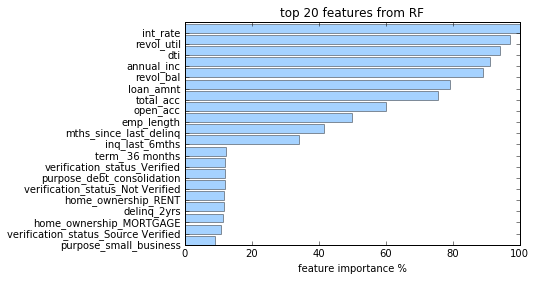

In [17]:

feature_importances = forest.feature_importances_
feature_importances = 100.0 * (feature_importances / feature_importances.max())

indices = np.argsort(feature_importances)[-20:]
plt.barh(np.arange(20), feature_importances[indices], color='dodgerblue', alpha=0.4)
plt.yticks(np.arange(20 + 0.25), np.array(X.columns)[indices])
plt.xlabel("feature importance %")
plt.title("top 20 features from RF")
plt.show()


### GBDT的预测效果

In [18]:

gbdt = GradientBoostingClassifier(min_samples_split=50, n_estimators=300, learning_rate=0.1, random_state=0)
gbdt.fit(x_train, y_train)

train_predict = gbdt.predict(x_train)
print("训练集合上的f1指标:%.4f" % f1_score(y_train, train_predict))
test_predict = gbdt.predict(x_test)
print("测试集合上的f1指标:%.4f" % f1_score(y_test, test_predict))

训练集合上的f1指标:0.9287
测试集合上的f1指标:0.9198


#### 基于GBDT获取影响放贷的二十大因素

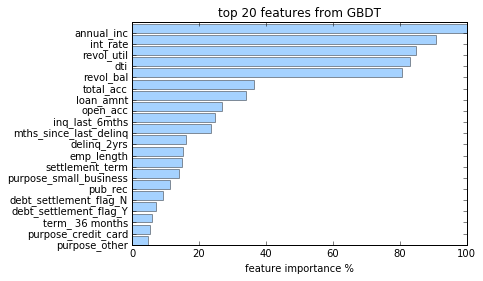

In [19]:

feature_importances = gbdt.feature_importances_
feature_importances = 100.0 * (feature_importances / feature_importances.max())

indices = np.argsort(feature_importances)[-20:]
plt.barh(np.arange(20), feature_importances[indices], color='dodgerblue', alpha=0.4)
plt.yticks(np.arange(20 + 0.25), np.array(X.columns)[indices])
plt.xlabel("feature importance %")
plt.title("top 20 features from GBDT")
plt.show()


In [20]:
# 在实际工作中，如果发现模型的效果不如意，那么可能需要考虑特征选择和降维
# 使用逻辑回归来分析数据 + 特征选择 + 降维
# 特征选择：从所有特征属性中抽取出来影响目标属性(target)效果最大的特征属性作为下一步的特征属性列表\
# 很多特征选择工程都是选择方差比较大特征属性
# 也可以使用随机森林、GBDT、决策树来进行特征选择

# 降维：压缩样本的维度空间，直白来讲，就是讲DataFrame中原本的多个列合并成为一列

# 1. 特征选择
feature_importances = gbdt.feature_importances_
indices = np.argsort(feature_importances)[-10:]
top10_features = np.array(X.columns)[indices]

# 2. 提取影响最大的十个特征属性
x_train2 = x_train[top10_features]
x_test2 = x_test[top10_features]

# 3. 降维处理
x_train3 = x_train.drop(top10_features, 1, inplace=False)
x_test3 = x_test.drop(top10_features, 1, inplace=False)
pca = PCA(n_components=10)
pca.fit(x_train3)
x_test3 = pca.transform(x_test3)
x_train3 = pca.transform(x_train3)

# 4. 两个DataFrame合并
x_train2 = np.hstack([x_train2, x_train3])
x_test2 = np.hstack([x_test2, x_test3])


lr = LogisticRegression(C = 0.1, fit_intercept=True, max_iter=100, penalty='l1', random_state=0)
lr.fit(x_train2, y_train)

train_predict = lr.predict(x_train2)
print("训练集合上的f1指标:%.4f" % f1_score(y_train, train_predict))
test_predict = lr.predict(x_test2)
print("测试集合上的f1指标:%.4f" % f1_score(y_test, test_predict))

训练集合上的f1指标:0.9247
测试集合上的f1指标:0.9196
